<a href="https://colab.research.google.com/github/pratik-tan10/SummerProject/blob/main/Monthly_WaSSI_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 98.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

### Read the polygon shapefile

In [ ]:
gdf = gpd.read_file("/content/skeleton.shp")

In [ ]:
gdf.head()

,NAME,NAMELSAD,Name_1,States,HUC12,AG_2016,AG_BAU,AG_EXP,Urb_2016,Urb_BAU,Urb_EXP,Huc8Ag016,Huc8Urb016,HUC8INT,ShapeArea,HUC8Area,geometry
0,DeKalb,DeKalb County,Snake Creek-Town Creek,AL,060300010702,2028,1674,2362,1844,1729,1720,253825,419435,6030001,20.369509,5205.755251,"POLYGON ((942800.842 1347861.575, 942844.754 1..."
1,DeKalb,DeKalb County,Snake Creek-Town Creek,AL,060300010702,96,19,62,52,49,49,253825,419435,6030001,1.409787,5205.755251,"POLYGON ((929374.871 1321341.556, 929346.822 1..."
2,DeKalb,DeKalb County,Snake Creek-Town Creek,AL,060300010702,3249,1908,2983,8967,8553,8591,253825,419435,6030001,102.365306,5205.755251,"POLYGON ((939036.097 1332355.554, 939033.643 1..."
3,DeKalb,DeKalb County,Reedy Creek-Town Creek,AL,060300010703,9396,6056,8921,18174,18321,18419,253825,419435,6030001,143.267682,5205.755251,"POLYGON ((927255.828 1327526.952, 927254.971 1..."
4,DeKalb,DeKalb County,Reedy Creek-Town Creek,AL,060300010703,770,449,769,1382,1472,1460,253825,419435,6030001,9.309517,5205.755251,"POLYGON ((932975.989 1321411.036, 932947.788 1..."


### Read water availability and Join to the polygons

In [ ]:
water_available = pd.read_csv('/content/hydrovizWaterData.csv', skiprows = 4)
flow_data = water_available[["HUC8 ID", "Mean Annual Flow", "Groundwater Recharge"]]
flow_data.head()

,HUC8 ID,Mean Annual Flow,Groundwater Recharge
0,3160201,25940.855268,738.329884
1,3160205,139.110864,454.409905
2,3140106,1102.464624,935.604252
3,3140107,73.056442,229.104280
4,3140201,1683.983493,975.018561


### Convert water availability form Mm³/year to MGD

In [ ]:
merged_df = pd.merge(gdf, flow_data, left_on='HUC8INT', right_on='HUC8 ID', how='inner')
# Convert Mm³/year to Mgal/day
conversion_factor = 0.723759

merged_df["Mean Annual Flow"] = merged_df["Mean Annual Flow"]*conversion_factor
merged_df["Groundwater Recharge"] = merged_df["Groundwater Recharge"]*conversion_factor

merged_df.head()


,NAME,NAMELSAD,Name_1,States,HUC12,AG_2016,AG_BAU,AG_EXP,Urb_2016,Urb_BAU,Urb_EXP,Huc8Ag016,Huc8Urb016,HUC8INT,ShapeArea,HUC8Area,geometry,HUC8 ID,Mean Annual Flow,Groundwater Recharge
0,DeKalb,DeKalb County,Snake Creek-Town Creek,AL,060300010702,2028,1674,2362,1844,1729,1720,253825,419435,6030001,20.369509,5205.755251,"POLYGON ((942800.842 1347861.575, 942844.754 1...",6030001,21942.865842,1119.540873
1,DeKalb,DeKalb County,Snake Creek-Town Creek,AL,060300010702,96,19,62,52,49,49,253825,419435,6030001,1.409787,5205.755251,"POLYGON ((929374.871 1321341.556, 929346.822 1...",6030001,21942.865842,1119.540873
2,DeKalb,DeKalb County,Snake Creek-Town Creek,AL,060300010702,3249,1908,2983,8967,8553,8591,253825,419435,6030001,102.365306,5205.755251,"POLYGON ((939036.097 1332355.554, 939033.643 1...",6030001,21942.865842,1119.540873
3,DeKalb,DeKalb County,Reedy Creek-Town Creek,AL,060300010703,9396,6056,8921,18174,18321,18419,253825,419435,6030001,143.267682,5205.755251,"POLYGON ((927255.828 1327526.952, 927254.971 1...",6030001,21942.865842,1119.540873
4,DeKalb,DeKalb County,Reedy Creek-Town Creek,AL,060300010703,770,449,769,1382,1472,1460,253825,419435,6030001,9.309517,5205.755251,"POLYGON ((932975.989 1321411.036, 932947.788 1...",6030001,21942.865842,1119.540873


### Read the excel file containting monthy water withdrawl and water return

In [ ]:
# Define the months to read
months = ['May', 'June', 'July', 'August', 'September']

# Specify the path to the Excel file
file_path = '/content/Monthly Water Demands by Subbasin.xlsx'

# Read all sheets into a dictionary of DataFrames
data = pd.read_excel(file_path, sheet_name=None)

withdrawl_sheets = ['May Withdrawal',
 'June Withdrawal',
 'July Withdrawal',
 'August Withdrawal',
 'September Withdrawal']
 
return_sheets = ['May Return',
 'June Return',
 'July Return',
 'August Return',
 'September Return']


### Sanity check for column names

In [ ]:
for month in months:
  withdrawal_sheet = month + ' Withdrawal'
  return_sheet = month + ' Return'
  withdrawl_ = data[withdrawal_sheet]
  return_ = data[return_sheet]
  print(list(withdrawl_))

['HUC', 'Subbasins (split ID into another column)', 'Public Supply/Residential GW Withdrawal ', 'Public Supply SW Withdrawal', 'Industrial/Mining GW Withdrawal', 'Industrial/Mining SW Withdrawal', 'Thermoelectric SW Withdrawal', 'Agriculture GW Withdrawal', 'Agriculture SW Withdrawal', 'Total GW Withdrawal', 'Total SW Withdrawal']
['HUC', 'Subbasins', 'Public Supply/Residential GW Withdrawal ', 'Public Supply SW Withdrawal', 'Industrial/Mining GW Withdrawal', 'Industrial/Mining SW Withdrawal', 'Thermoelectric SW Withdrawal', 'Agriculture GW Withdrawal', 'Agriculture SW Withdrawal', 'Total GW Withdrawal', 'Total SW Withdrawal']
['HUC', 'Subbasins', 'Public Supply/Residential GW Withdrawal ', 'Public Supply SW Withdrawal', 'Industrial/Mining GW Withdrawal', 'Industrial/Mining SW Withdrawal', 'Thermoelectric SW Withdrawal', 'Agriculture GW Withdrawal', 'Agriculture SW Withdrawal', 'Total GW Withdrawal', 'Total SW Withdrawal']
['HUC', 'Subbasins', 'Public Supply/Residential GW Withdrawal '

# Defnine a helper function to calculate WaSSI

In [ ]:
def calculate_wassi(df, BAU = True):
  agri = df['Agriculture GW Withdrawal'] + df['Agriculture SW Withdrawal'] #- df['Agriculture']
  public = float(df['Public Supply/Residential GW Withdrawal ']) + float(df['Public Supply SW Withdrawal'])# - float(df['Public Supply'])
  industrial =  df ['Industrial/Mining GW Withdrawal'] + df['Industrial/Mining SW Withdrawal']# - df['Industrial/Mining']
  thermo = df['Thermoelectric SW Withdrawal'] - df['Thermoelectric']

  urban = public + industrial + thermo

  agri_area = 'AG_BAU' if BAU else 'AG_EXP'
  urban_area = 'Urb_BAU' if BAU else 'Urb_EXP'

  try:
    agri_total = agri * df[agri_area] / df['Huc8Ag016']
  except:
    agri_total = 0
  
  try:
    urban_total = urban * df[urban_area] / df['Huc8Urb016']
  except:
    urban_total

  consumption_total = agri_total + urban_total

  try:
    avaliable_total = (df['Mean Annual Flow'] + df['Groundwater Recharge']) * df['ShapeArea'] / df['HUC8Area']
  except:
    avaliable_total = 0

  try:
    WaSSI = consumption_total / (avaliable_total * 0.5)
  except:
    WaSSI = 0

  try:
    WaSSIagri = agri_total / (avaliable_total * 0.5)
  except:
    WaSSIagri = 0
  try:
    WaSSIurban = urban_total / (avaliable_total * 0.5)
  except:
    WaSSIurban = 0
  
  return (WaSSIagri, WaSSIurban, WaSSI)

### Declare 3 dictionaries to store `AgriWaSSI`, `UrbanWaSSI`, and `WaSSI`.

In [ ]:
AgriWaSSI = dict()
UrbanWaSSI = dict()
WaSSI = dict()

# For each month, obtain 3 different WaSSI values and push to corresponding dictionaries.

In [ ]:
for month in months:
  withdrawal_sheet = month + ' Withdrawal'
  return_sheet = month + ' Return'

  # Obtain and join water withdrawal sheet with water return sheet
  withdrawl_ = data[withdrawal_sheet]
  return_ = data[return_sheet]
  withdrawl_return = pd.merge(withdrawl_, return_, left_on='HUC', right_on='HUC', how='inner')

  # Perform the inner join
  combined = pd.merge(merged_df, withdrawl_return, left_on='HUC8INT', right_on='HUC', how='inner')

  # Calculate WaSSI
  WaSSI_values = pd.DataFrame({"AgriWaSSI" :[], "UrbanWaSSI":[], "WaSSI":[]})
  WaSSI_values[["AgriWaSSI", "UrbanWaSSI", "WaSSI"]] = combined.apply(lambda x: calculate_wassi(x, True), axis = 1, result_type='expand')
  AgriWaSSI[month] = WaSSI_values["AgriWaSSI"]
  UrbanWaSSI[month] = WaSSI_values["UrbanWaSSI"]
  WaSSI[month] = WaSSI_values["WaSSI"]
  print( f"Done for the month of {month}.")


Done for the month of May.
Done for the month of June.
Done for the month of July.
Done for the month of August.
Done for the month of September.


### Obtain table of counts for different stress level

In [ ]:
def WaSSI_table(wassi):
  table_data = {"Month":[],
                "Low stress":[],
                "Medium stress":[],
                "High stress": []
                }
  for i, month in enumerate(wassi.keys()):
    table_data["Month"].append(month)
    table_data["Low stress"].append(np.sum((wassi[month] >= 0.1) & (wassi[month] < 0.2)))
    table_data["Medium stress"].append(np.sum((wassi[month] >= 0.2) & (wassi[month] < 0.4)))
    table_data["High stress"].append(np.sum(wassi[month] >= 0.4))
  return pd.DataFrame(table_data)



In [ ]:
WaSSI_table(UrbanWaSSI)

,Month,Low stress,Medium stress,High stress
0,May,58,19,3
1,June,66,25,4
2,July,69,24,4
3,August,64,24,4
4,September,61,22,18


### Plot the kernel density plots for each month

In [ ]:
month = 'September'
withdrawal_sheet = month + ' Withdrawal'
return_sheet = month + ' Return'

# Obtain and join water withdrawal sheet with water return sheet
withdrawl_ = data[withdrawal_sheet]
return_ = data[return_sheet]
withdrawl_return = pd.merge(withdrawl_, return_, left_on='HUC', right_on='HUC', how='inner')

# Perform the inner join
combined = pd.merge(merged_df, withdrawl_return, left_on='HUC8INT', right_on='HUC', how='inner')

# Calculate WaSSI
WaSSI_values = pd.DataFrame({"AgriWaSSI" :[], "UrbanWaSSI":[], "WaSSI":[]})
WaSSI_values[["AgriWaSSI", "UrbanWaSSI", "WaSSI"]] = combined.apply(lambda x: calculate_wassi(x, True), axis = 1, result_type='expand')

In [ ]:
for month, d in AgriWaSSI.items():
  print(month, " : ", np.sum(d == 0))

May  :  1881
June  :  1881
July  :  1881
August  :  1881
September  :  1881


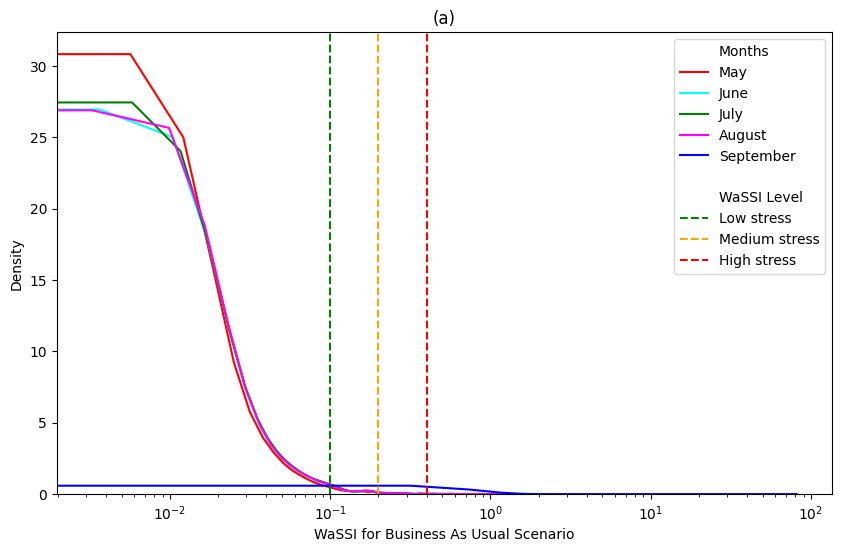

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["red", "cyan", "green", "magenta", "blue"]
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Iterate over the columns and create density plots
for i, month in enumerate(months):
    sd = WaSSI[month]
    sns.kdeplot(data=sd, label=month, color=colors[i])
# Set the x-axis scale to logarithmic/exponential
plt.xscale('log')

# Add vertical lines at specific x-values
plt.axvline(x=0.1, color='green', linestyle='--')
plt.axvline(x=0.2, color='orange', linestyle='--')
plt.axvline(x=0.4, color='red', linestyle='--')
# Create separate legend handles and labels for the vertical lines and data lines
line_handles = [plt.Line2D([], [], color='green', linestyle='--'),
                plt.Line2D([], [], color='orange', linestyle='--'),
                plt.Line2D([], [], color='red', linestyle='--')]

line_labels = ['Low stress', 'Medium stress', 'High stress']

empty_handle, month_label = [plt.Line2D([],[], color = 'white', linestyle = '--')], ["Months"]
empty_handle2, level_label = [plt.Line2D([],[], color = 'white', linestyle = '--')], ["WaSSI Level"]
data_handles, data_labels = plt.gca().get_legend_handles_labels()

plt.title("(a)")
plt.xlabel('WaSSI for Business As Usual Scenario')

# Plot the legends separately
plt.legend(handles=[*empty_handle, *data_handles, *empty_handle, *empty_handle, *line_handles], labels=[*month_label, *data_labels,"", *level_label, *line_labels])
plt.show()


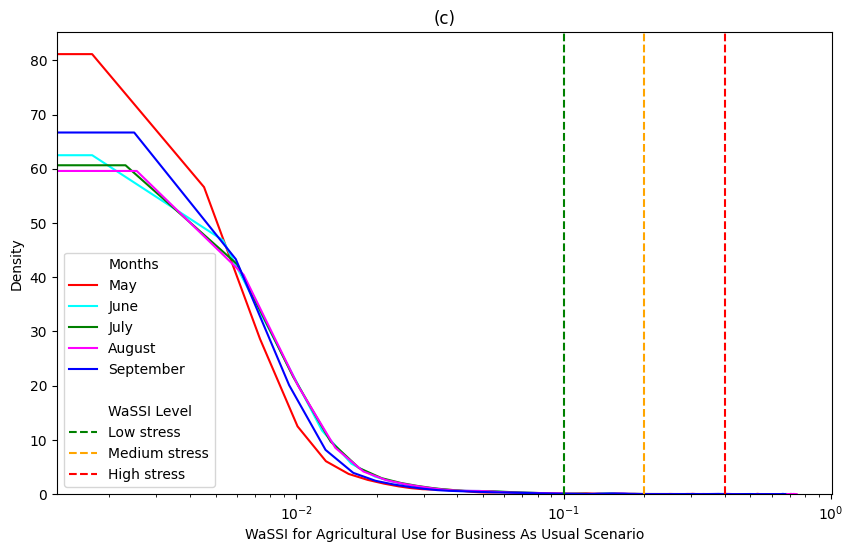

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Iterate over the columns and create density plots
for i, month in enumerate(months):
    sns.kdeplot(data=AgriWaSSI[month], label=month, color=colors[i])
# Set the x-axis scale to logarithmic/exponential
plt.xscale('log')

# Add vertical lines at specific x-values
plt.axvline(x=0.1, color='green', linestyle='--')
plt.axvline(x=0.2, color='orange', linestyle='--')
plt.axvline(x=0.4, color='red', linestyle='--')
# Create separate legend handles and labels for the vertical lines and data lines
line_handles = [plt.Line2D([], [], color='green', linestyle='--'),
                plt.Line2D([], [], color='orange', linestyle='--'),
                plt.Line2D([], [], color='red', linestyle='--')]

line_labels = ['Low stress', 'Medium stress', 'High stress']

empty_handle, month_label = [plt.Line2D([],[], color = 'white', linestyle = '--')], ["Months"]
empty_handle2, level_label = [plt.Line2D([],[], color = 'white', linestyle = '--')], ["WaSSI Level"]
data_handles, data_labels = plt.gca().get_legend_handles_labels()

# Add labels, title, legend, etc.
plt.title("(c)")
plt.xlabel('WaSSI for Agricultural Use for Business As Usual Scenario')

# Plot the legends separately
plt.legend(handles=[*empty_handle, *data_handles, *empty_handle, *empty_handle, *line_handles], labels=[*month_label, *data_labels,"", *level_label, *line_labels])
plt.show()

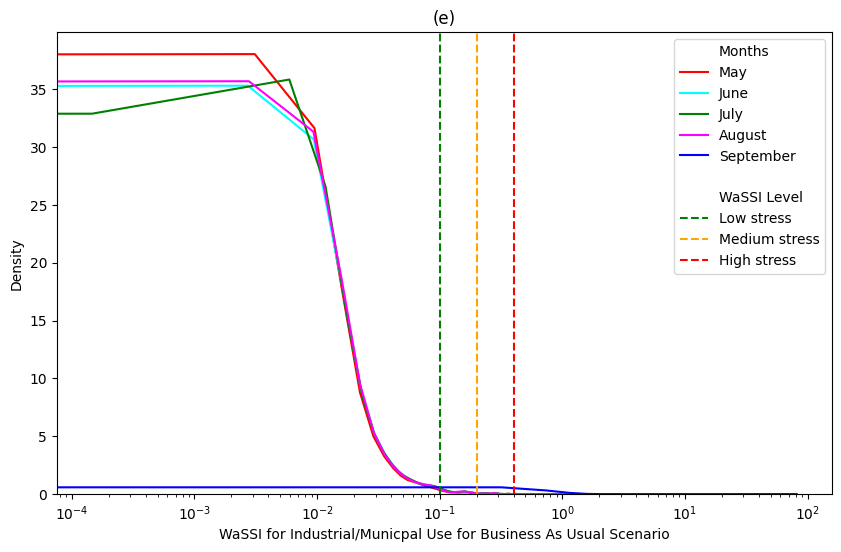

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Iterate over the columns and create density plots
for i, month in enumerate(months):
    sns.kdeplot(data=UrbanWaSSI[month], label=month, color=colors[i])
# Set the x-axis scale to logarithmic/exponential
plt.xscale('log')

# Add vertical lines at specific x-values
plt.axvline(x=0.1, color='green', linestyle='--')
plt.axvline(x=0.2, color='orange', linestyle='--')
plt.axvline(x=0.4, color='red', linestyle='--')
# Create separate legend handles and labels for the vertical lines and data lines
line_handles = [plt.Line2D([], [], color='green', linestyle='--'),
                plt.Line2D([], [], color='orange', linestyle='--'),
                plt.Line2D([], [], color='red', linestyle='--')]

line_labels = ['Low stress', 'Medium stress', 'High stress']

empty_handle, month_label = [plt.Line2D([],[], color = 'white', linestyle = '--')], ["Months"]
empty_handle2, level_label = [plt.Line2D([],[], color = 'white', linestyle = '--')], ["WaSSI Level"]
data_handles, data_labels = plt.gca().get_legend_handles_labels()

# Add labels, title, legend, etc.
plt.title("(e)")
plt.xlabel('WaSSI for Industrial/Municpal Use for Business As Usual Scenario')

# Plot the legends separately
plt.legend(handles=[*empty_handle, *data_handles, *empty_handle, *empty_handle, *line_handles], labels=[*month_label, *data_labels,"", *level_label, *line_labels])
plt.show()


In [ ]:
import shutil
import os

# Get the current working directory
current_directory = os.getcwd()

# Set the name of the zip file
zip_file_name = 'Monthly WaSSI calculation.zip'

# Create a zip file of the current directory
shutil.make_archive(zip_file_name, 'zip', current_directory)

# Download the zip file
from google.colab import files
files.download(zip_file_name)


KeyboardInterrupt: ignored

In [275]:
import shutil
import os
from google.colab import files

# Helper function to zip all files from the current working directory and download it
def finish_work(output_zip_file_name):
    # Get the current working directory
    current_directory = os.getcwd()

    # Create a temporary directory to copy the necessary files
    temp_directory = os.path.join(current_directory, 'temp')
    os.makedirs(temp_directory, exist_ok=True)

    # Iterate over the files in the current directory and copy them to the temporary directory
    for file_name in os.listdir(current_directory):
        if file_name != 'sample_data':  # Exclude the 'sample_data' folder
            try:
                shutil.copy2(os.path.join(current_directory, file_name), temp_directory)
            except:
                print(f"Could not move {file_name}")

    # Create a zip file of the notebook file and the necessary files
    shutil.make_archive(output_zip_file_name, 'zip', temp_directory)

    # Remove the temporary directory
    shutil.rmtree(temp_directory)

    # Download the zip file
    files.download(output_zip_file_name + '.zip')

In [ ]:
finish_work('Monthly WaSSI calculation.zip')

In [ ]:
import shutil
import os

# Get the current working directory
current_directory = os.getcwd()

# Set the name of the output zip file
output_zip_file_name = 'Monthly WaSSI calculation.zip'

# Create a temporary directory to copy the necessary files
temp_directory = os.path.join(current_directory, 'temp')
os.makedirs(temp_directory, exist_ok=True)

# Iterate over the files in the current directory and copy them to the temporary directory
for file_name in os.listdir(current_directory):
    if file_name != 'sample_data':  # Exclude the 'sample_data' folder
        try:
          shutil.copy2(os.path.join(current_directory, file_name), temp_directory)
        except:
          print(f"Could not move {file_name}")

# Create a zip file of the notebook file and the necessary files
shutil.make_archive(output_zip_file_name, 'zip', temp_directory)

# Remove the temporary directory
shutil.rmtree(temp_directory)

# Download the zip file
from google.colab import files
files.download(output_zip_file_name + '.zip')


Could not move .config
Could not move temp
Could not move skeleton
Could not move .ipynb_checkpoints


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from zipfile import ZipFile
# Extract the contents of the zip file
zip_file_path = "/content/Monthly WaSSI calculation.zip.zip"
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

## Delete fields of a gedataframe

In [148]:
hucpop = gpd.read_file("/content/hucpop.shp")
hucpop["HUC8INT"] = hucpop["HUC8"].astype(int)
list(hucpop)


['HUC8',
 'ag2016',
 'urban2016',
 'agExp',
 'urbExp',
 'agBAU',
 'urbBAU',
 'SSP22040',
 'ICLUSID',
 'IclsUrbBAU',
 'iclsUrbExp',
 'selfUrbExp',
 'selfUrbBAU',
 'ICLUSgeoid',
 'selfAgExp',
 'selfAgBAU',
 'selfArea',
 'HUC8Area',
 'geometry',
 'HUC8INT']

In [149]:
hydroviz = pd.read_csv('/content/hydrovizWaterData.csv')
list(hydroviz)

['State',
 'HUC8 Name',
 'HUC8 ID',
 'Area',
 'Mean Annual Flow',
 'Surface Water Consumption Agriculture',
 'Surface Water Consumption Municipal & Industrial',
 'Surface Water Consumption Thermoelectric Power',
 'Surface Water Consumption Agriculture in 2030',
 'Surface Water Consumption Municipal & Industrial in 2030',
 'Groundwater Recharge',
 'Groundwater Pumping Agriculture',
 'Groundwater Pumping Municipal & Industrial',
 'Groundwater Pumping Thermoelectric Power',
 'Municipal Wastewater',
 'Brackish Groundwater',
 'Water Stress Ratio',
 'Surface Water Stress Ratio',
 'Groundwater Stress Ratio',
 'Water Stress Ratio (Agricultural)',
 'Water Stress Ratio (Municipal)',
 'Water Stress Ratio (Thermoelectric)',
 'Land in Farms',
 'Land in Irrigation Farms',
 'Market Value of Agricultural Products Sold']

In [150]:
joined = pd.merge(hucpop, hydroviz, left_on='HUC8INT', right_on='HUC8 ID', how='inner')

In [151]:
list(joined)

['HUC8',
 'ag2016',
 'urban2016',
 'agExp',
 'urbExp',
 'agBAU',
 'urbBAU',
 'SSP22040',
 'ICLUSID',
 'IclsUrbBAU',
 'iclsUrbExp',
 'selfUrbExp',
 'selfUrbBAU',
 'ICLUSgeoid',
 'selfAgExp',
 'selfAgBAU',
 'selfArea',
 'HUC8Area',
 'geometry',
 'HUC8INT',
 'State',
 'HUC8 Name',
 'HUC8 ID',
 'Area',
 'Mean Annual Flow',
 'Surface Water Consumption Agriculture',
 'Surface Water Consumption Municipal & Industrial',
 'Surface Water Consumption Thermoelectric Power',
 'Surface Water Consumption Agriculture in 2030',
 'Surface Water Consumption Municipal & Industrial in 2030',
 'Groundwater Recharge',
 'Groundwater Pumping Agriculture',
 'Groundwater Pumping Municipal & Industrial',
 'Groundwater Pumping Thermoelectric Power',
 'Municipal Wastewater',
 'Brackish Groundwater',
 'Water Stress Ratio',
 'Surface Water Stress Ratio',
 'Groundwater Stress Ratio',
 'Water Stress Ratio (Agricultural)',
 'Water Stress Ratio (Municipal)',
 'Water Stress Ratio (Thermoelectric)',
 'Land in Farms',
 'Lan

In [223]:
# Allocate population to smaller units
population_bau = (joined['SSP22040']) * (joined['selfUrbBAU']) / (joined['IclsUrbBAU'])
population_exp = (joined['SSP22040']) * (joined['selfUrbExp']) / (joined['IclsUrbBAU'])

# Find percapita production
production_bau = joined['selfAgBAU'] / population_bau
production_exp = joined['selfAgExp'] / population_exp
production_diff = production_exp - production_bau

joined["PopBAU"] = population_bau
joined["PopExp"] = population_exp
joined["ProdBAU"] = production_bau
joined["prodExp"] = production_exp
joined["ProdDiff"] = production_diff

In [224]:
availability = (joined['Mean Annual Flow'] + joined['Groundwater Recharge']) * joined['selfArea'] / joined['HUC8Area']
availability
joined["availb"] = availability

In [225]:
urban_use = (joined[['Surface Water Consumption Municipal & Industrial',
                    'Surface Water Consumption Thermoelectric Power', 
                    'Groundwater Pumping Municipal & Industrial',
                    'Groundwater Pumping Thermoelectric Power',
                    'Municipal Wastewater',
                    'Brackish Groundwater']
 ]).apply(sum, axis = 1) / joined['urban2016']

joined["UrbUseBAU"] = urban_use * joined['selfUrbBAU']
joined["UrbUseExp"] = urban_use * joined['selfUrbExp']

In [226]:
agri_use = (joined[['Surface Water Consumption Agriculture',
                    'Groundwater Pumping Agriculture']
 ]).apply(sum, axis = 1) / joined['ag2016']

joined["AgUseBAU"] = agri_use * joined['selfAgBAU']
joined["AgUseExp"] = agri_use * joined['selfAgExp']

In [227]:
WaSSI_BAU = (urban_use * joined['selfUrbBAU'] + agri_use * joined['selfAgBAU']) / (0.5 * availability)
WaSSI_EXP = (urban_use * joined['selfUrbExp'] + agri_use * joined['selfAgExp']) / (0.5* availability)
WaSSI_diff = WaSSI_EXP - WaSSI_BAU

joined["WassiBAU"] = WaSSI_BAU
joined["WassiExp"] = WaSSI_EXP
joined["WaSSIdiff"] = WaSSI_diff

In [228]:
agriWaSSI_BAU = (agri_use * joined['selfAgBAU']) / (0.5 * availability)
agriWaSSI_EXP = (agri_use * joined['selfAgExp']) / (0.5* availability)
agri_WaSSI_diff =  agriWaSSI_EXP - agriWaSSI_BAU
joined["AgWSiBAU"] = agriWaSSI_BAU
joined["AgWSiExp"] = agriWaSSI_EXP
joined["AgWSiDiff"] = agri_WaSSI_diff

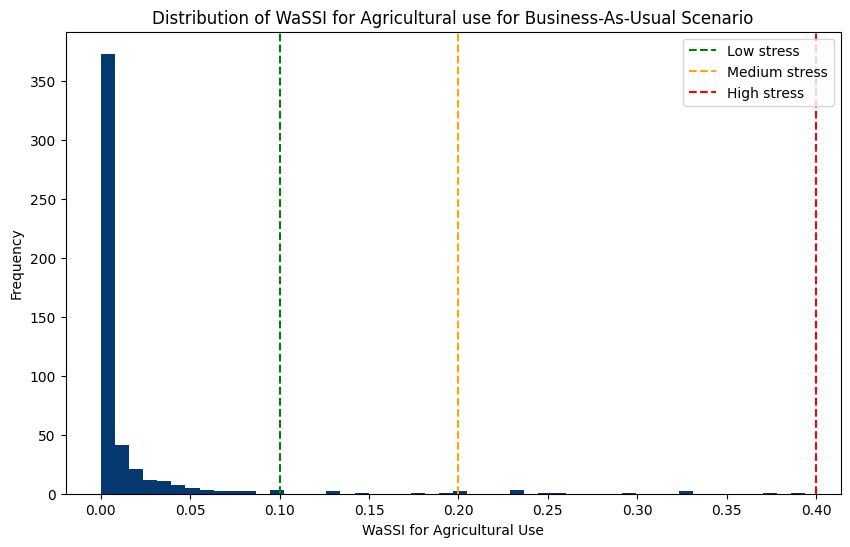

In [219]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plotting the stacked histogram
plt.hist(agriWaSSI_BAU, bins=50, color = "#063970")

# Add vertical lines at specific x-values
plt.axvline(x=0.1, color='green', linestyle='--')
plt.axvline(x=0.2, color='orange', linestyle='--')
plt.axvline(x=0.4, color='red', linestyle='--')
# Create separate legend handles and labels for the vertical lines and data lines
line_handles = [plt.Line2D([], [], color='green', linestyle='--'),
                plt.Line2D([], [], color='orange', linestyle='--'),
                plt.Line2D([], [], color='red', linestyle='--')]

line_labels = ['Low stress', 'Medium stress', 'High stress']
data_handles, data_labels = plt.gca().get_legend_handles_labels()

# Customizing the plot
plt.title('Distribution of WaSSI for Agricultural use for Business-As-Usual Scenario')
plt.xlabel('WaSSI for Agricultural Use')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Plot the legends separately
plt.legend(handles=[*line_handles], labels=[*line_labels])
plt.show()


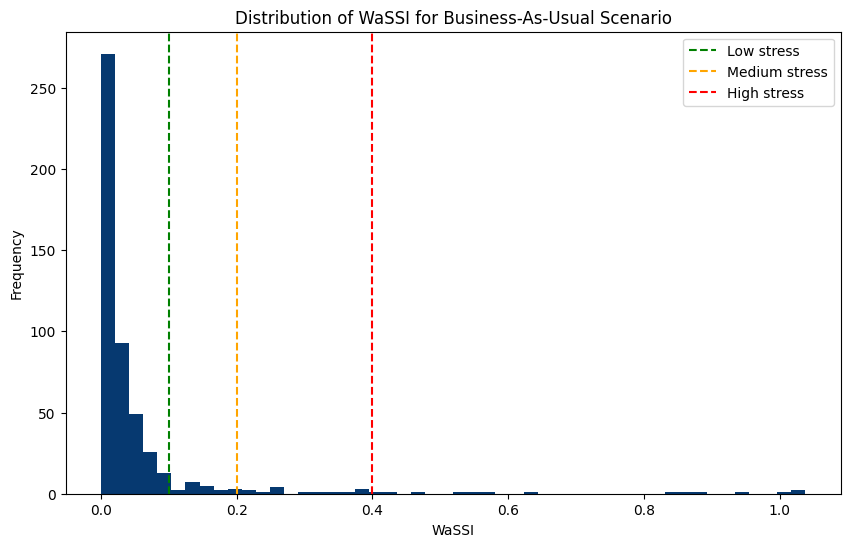

In [185]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plotting the stacked histogram
plt.hist(WaSSI_BAU, bins=50, color = "#063970")

# Add vertical lines at specific x-values
plt.axvline(x=0.1, color='green', linestyle='--')
plt.axvline(x=0.2, color='orange', linestyle='--')
plt.axvline(x=0.4, color='red', linestyle='--')
# Create separate legend handles and labels for the vertical lines and data lines
line_handles = [plt.Line2D([], [], color='green', linestyle='--'),
                plt.Line2D([], [], color='orange', linestyle='--'),
                plt.Line2D([], [], color='red', linestyle='--')]

line_labels = ['Low stress', 'Medium stress', 'High stress']
data_handles, data_labels = plt.gca().get_legend_handles_labels()

# Customizing the plot
plt.title('Distribution of WaSSI for Business-As-Usual Scenario')
plt.xlabel('WaSSI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Plot the legends separately
plt.legend(handles=[*line_handles], labels=[*line_labels])
plt.show()


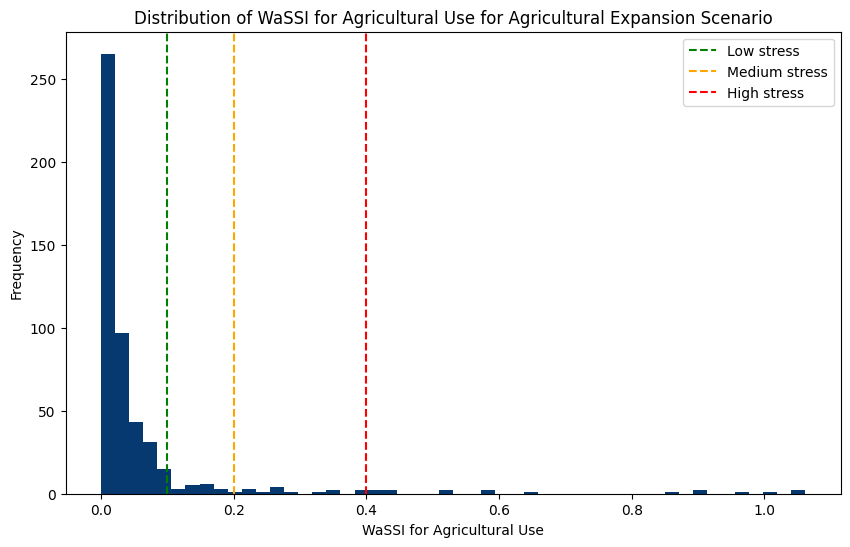

In [220]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plotting the stacked histogram
plt.hist(WaSSI_EXP, bins=50, color = "#063970")

# Add vertical lines at specific x-values
plt.axvline(x=0.1, color='green', linestyle='--')
plt.axvline(x=0.2, color='orange', linestyle='--')
plt.axvline(x=0.4, color='red', linestyle='--')
# Create separate legend handles and labels for the vertical lines and data lines
line_handles = [plt.Line2D([], [], color='green', linestyle='--'),
                plt.Line2D([], [], color='orange', linestyle='--'),
                plt.Line2D([], [], color='red', linestyle='--')]

line_labels = ['Low stress', 'Medium stress', 'High stress']
data_handles, data_labels = plt.gca().get_legend_handles_labels()

# Customizing the plot
plt.title('Distribution of WaSSI for Agricultural Use for Agricultural Expansion Scenario')
plt.xlabel('WaSSI for Agricultural Use')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Plot the legends separately
plt.legend(handles=[*line_handles], labels=[*line_labels])
plt.show()


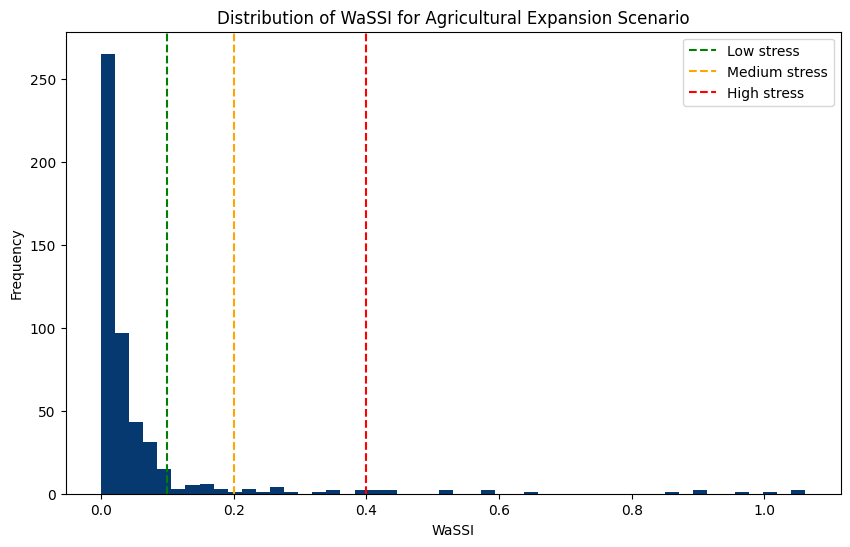

In [186]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plotting the stacked histogram
plt.hist(WaSSI_EXP, bins=50, color = "#063970")

# Add vertical lines at specific x-values
plt.axvline(x=0.1, color='green', linestyle='--')
plt.axvline(x=0.2, color='orange', linestyle='--')
plt.axvline(x=0.4, color='red', linestyle='--')
# Create separate legend handles and labels for the vertical lines and data lines
line_handles = [plt.Line2D([], [], color='green', linestyle='--'),
                plt.Line2D([], [], color='orange', linestyle='--'),
                plt.Line2D([], [], color='red', linestyle='--')]

line_labels = ['Low stress', 'Medium stress', 'High stress']
data_handles, data_labels = plt.gca().get_legend_handles_labels()

# Customizing the plot
plt.title('Distribution of WaSSI for Agricultural Expansion Scenario')
plt.xlabel('WaSSI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Plot the legends separately
plt.legend(handles=[*line_handles], labels=[*line_labels])
plt.show()


In [191]:
np.max((WaSSI_EXP - WaSSI_BAU))

0.05362871630758198

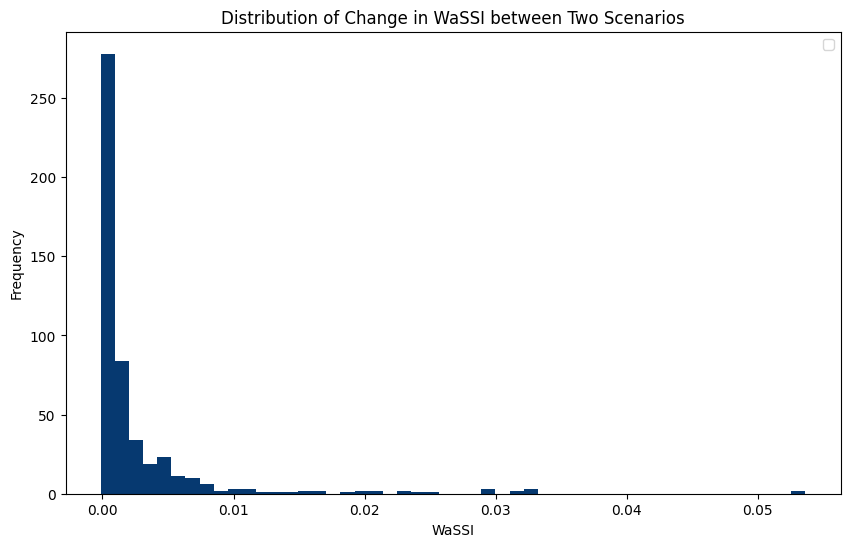

In [192]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plotting the stacked histogram
plt.hist(WaSSI_EXP - WaSSI_BAU, bins=50, color = "#063970")

line_labels = ['Low stress', 'Medium stress', 'High stress']
data_handles, data_labels = plt.gca().get_legend_handles_labels()

# Customizing the plot
plt.title('Distribution of Change in WaSSI between Two Scenarios')
plt.xlabel('WaSSI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()


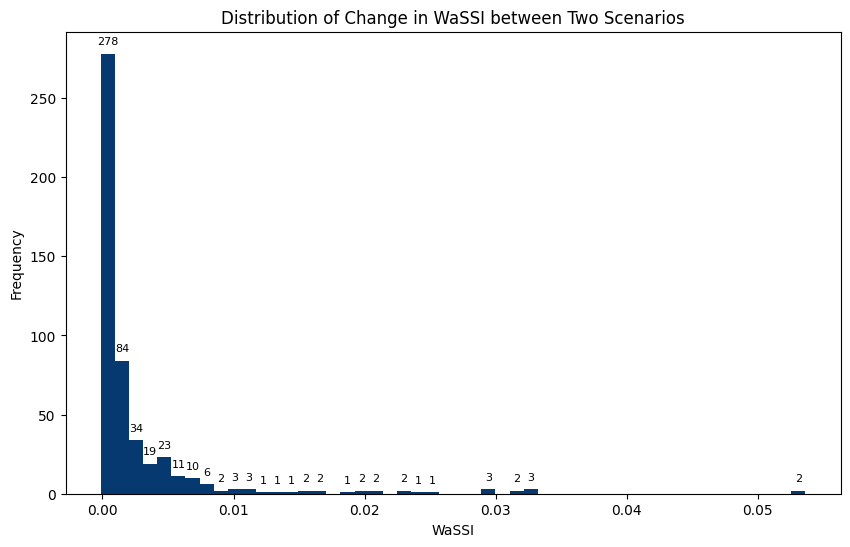

In [196]:
# Calculate the data for the histogram
data = WaSSI_EXP - WaSSI_BAU
bins = 50

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plotting the histogram
counts, bins, patches = plt.hist(data, bins=bins, color="#063970")

# Customizing the plot
plt.title('Distribution of Change in WaSSI between Two Scenarios')
plt.xlabel('WaSSI')
plt.ylabel('Frequency')

# Add count values at the top of each bar
for count, patch in zip(counts, patches):
    if count == 0:
      continue
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.annotate(str(int(count)), xy=(x, y), xytext=(0, 5), textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)

plt.show()

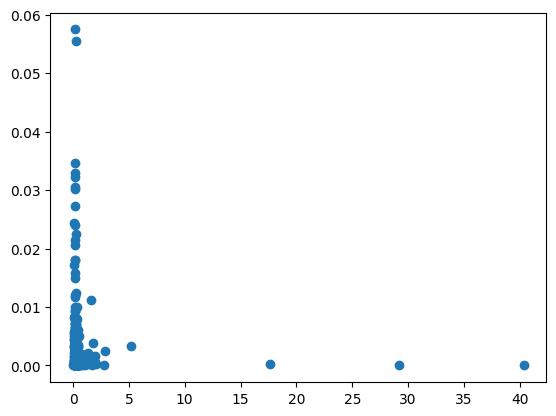

In [222]:
plt.scatter(production_diff/production_bau, agriWaSSI_EXP - agriWaSSI_BAU)
plt.show()

In [258]:
old_names = list(joined)
old_names.pop(old_names.index("geometry"))
old_names += ['geometry']

In [ ]:
joined.to_file('HUCpopWithWaSSI.shp', driver='ESRI Shapefile')

In [237]:
newer_gdf = gpd.read_file('HUCpopWithWaSSI.shp')

In [245]:
new_names = list(newer_gdf)


In [266]:
# Check if the values were correctly added.
for old_name, new_name in zip(old_names, new_names):
  similar = np.mean(joined[old_name] == newer_gdf[new_name])
  if similar < 1:
    print(old_name, "\t", new_name, "\t", similar)
    print(np.max(newer_gdf[new_name] - joined[old_name]))

PopBAU 	 PopBAU 	 0.9761431411530815
4.440892098500626e-16
PopExp 	 PopExp 	 0.9761431411530815
4.440892098500626e-16
ProdBAU 	 ProdBAU 	 0.584493041749503
4.909267437014364e-16
prodExp 	 prodExp 	 0.558648111332008
8.881784197001252e-16
ProdDiff 	 ProdDiff 	 0.43538767395626243
4.926614671774132e-16
availb 	 availb 	 0.9224652087475149
8.881784197001252e-16
UrbUseBAU 	 UrbUseBAU 	 0.4831013916500994
8.881784197001252e-16
UrbUseExp 	 UrbUseExp 	 0.5049701789264414
8.881784197001252e-16
AgUseBAU 	 AgUseBAU 	 0.49502982107355864
4.996003610813204e-16
AgUseExp 	 AgUseExp 	 0.47713717693836977
8.881784197001252e-16
WassiBAU 	 WassiBAU 	 0.03180914512922465
4.996003610813204e-16
WassiExp 	 WassiExp 	 0.03777335984095427
4.996003610813204e-16
WaSSIdiff 	 WaSSIdiff 	 0.08548707753479125
4.92824097503286e-16
AgWSiBAU 	 AgWSiBAU 	 0.23658051689860835
4.976081395893783e-16
AgWSiExp 	 AgWSiExp 	 0.21669980119284293
4.996003610813204e-16
AgWSiDiff 	 AgWSiDiff 	 0.21272365805168986
4.98949839777829

In [270]:
# Create a csv that shows which names were shortened to which name
rename_map = pd.DataFrame({"Short_Name": new_names, "Full Form": old_names})
rename_map.to_csv("HUCpopWithWaSSI_rename_map.csv", index = False, sep = ",")

### Zip all the files for the shapefile

In [272]:
import zipfile
import os

# List of files to zip and download
files_to_zip = [i for i in os.listdir() if i.startswith('HUCpopWithWaSSI')]

# Create a zip file
zip_filename = 'HUCpopWithWaSSI.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Add each file to the zip
    for file in files_to_zip:
        zipf.write(file)

# Send the zip file for download
os.system(f'zip {zip_filename}')
print("zip successful.")
# Optionally, remove the zip file after download
#os.remove(zip_filename)


zip successful.


In [274]:
finish_work('WaSSI calculation with Pop.zip')

Could not move .config
Could not move temp
Could not move .ipynb_checkpoints


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
keep_fields = ['HUC8', 
               'ag2016',
               'urban2016',
               'agExp',
               'urbExp',
               'agBAU',
               'urbBAU',
               'SSP22040',
               'ICLUSID',
               'geometry'
]

shape_only = hucpop[keep_fields]
type(shape_only)

geopandas.geodataframe.GeoDataFrame

In [ ]:
#shape_only.to_file('hucpop.shp', driver='ESRI Shapefile')